<a href="https://colab.research.google.com/github/hyperdbio/Android-inject/blob/master/ex02_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 목표
- 이진분류와 다중분류 이해하기
- Decision Tree 모델 활용 학습하기

In [67]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 라이브러리(matplotlib 기반)

from sklearn.model_selection import train_test_split #train, test 데이터로 나눠주는 함수
from sklearn.tree import DecisionTreeClassifier # 의사결정나무
from sklearn.metrics import accuracy_score, classification_report # 평가

# 1. 문제 정의
- 펭귄 데이터를 활용하여 다중분류 실습을 진행해보자
- 모델의 일반화 성능을 확인
- 데이터 인코딩을 적용해보자

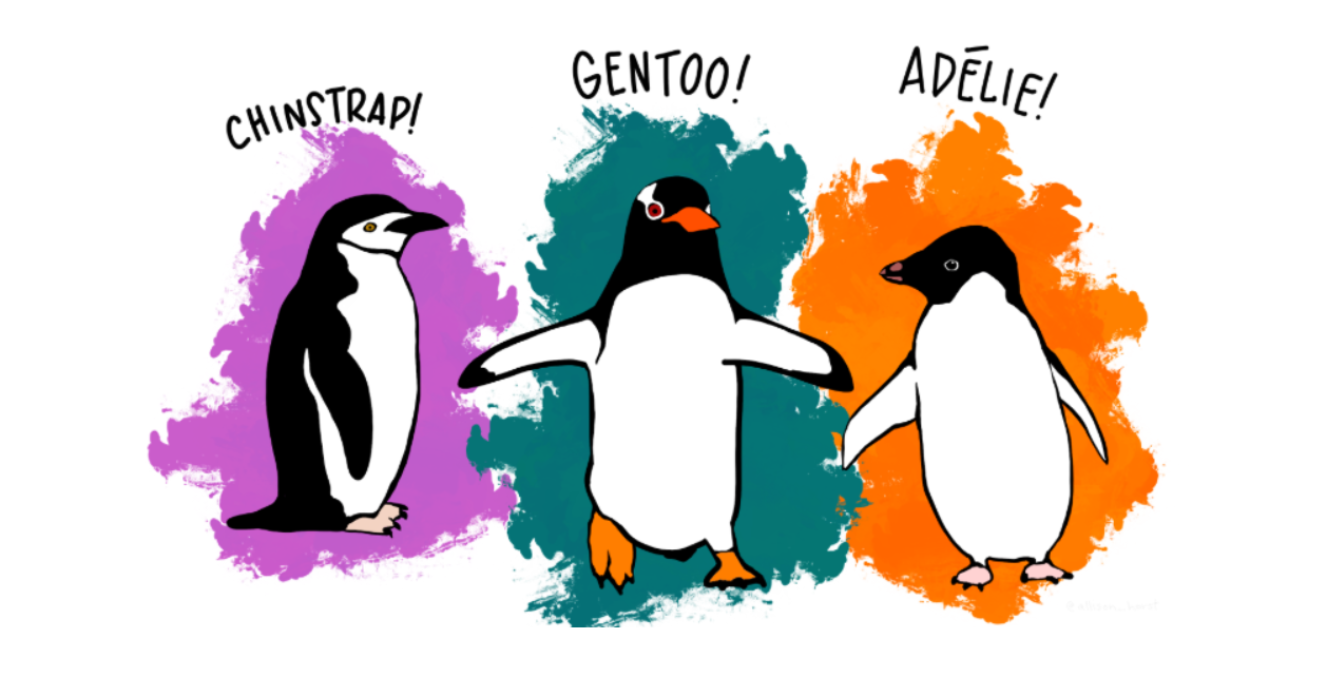

2. 데이터 로딩
https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/input?select=penguins_size.csv

In [2]:
# 데이터를 불러오기 위한 환경 세팅
# 1. 드라이브 연동
# 2. 작업 경로 이동 (현재 위치 먼저 확인 -> 수업 폴더로 경로 변경)

In [3]:
%pwd

'/content'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
%cd '/content/drive/MyDrive/Colab Notebooks/클라우드/머신러닝'

/content/drive/MyDrive/Colab Notebooks/클라우드/머신러닝


In [6]:
%pwd

'/content/drive/MyDrive/Colab Notebooks/클라우드/머신러닝'

In [7]:
df = pd.read_csv('./data/penguins_size.csv')

df.head(3)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [8]:
# 데이터의 정보 살펴보기
df.info()

# shape : (344,7)
# species : 펭귄 종류
# island : 서식 섬
# culmen_length_mm : 부리 길이
# culmen_depth_mm : 부리 깊이
# flipper_length_mm : 날개 길이
# body_mass_g : 몸무게


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
# 결측치 확인
df.isnull().sum().sort_values(ascending=False)

,0
sex,10
culmen_depth_mm,2
culmen_length_mm,2
flipper_length_mm,2
body_mass_g,2
island,0
species,0


In [10]:
5>3

True

In [11]:
df.describe() # 수치형 데이터만

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


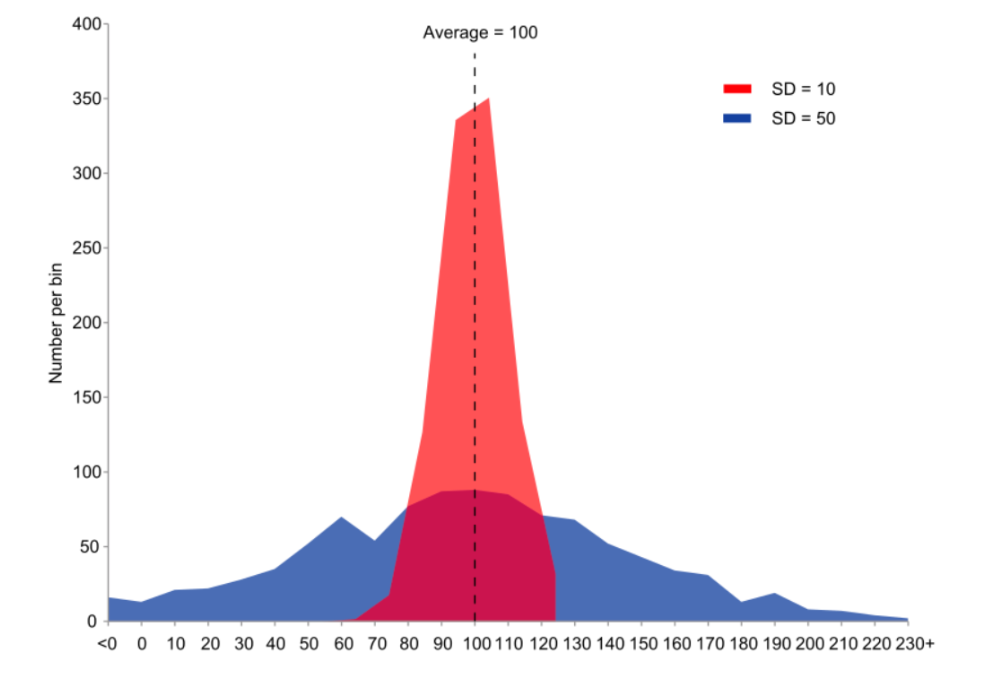

In [12]:
df.describe(include='all') # 수치형, 범주형 같이 나타냄

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


### 3. 데이터 전처리 및 탐색


In [13]:
from sklearn.impute import SimpleImputer # 결측치 채워주는 도구

imputer = SimpleImputer(strategy='most_frequent') # 최빈값으로 결측치 채우는 객체 생성
df2 = pd.DataFrame(imputer.fit_transform(df), columns = df.columns).copy()

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   species            344 non-null    object
 1   island             344 non-null    object
 2   culmen_length_mm   344 non-null    object
 3   culmen_depth_mm    344 non-null    object
 4   flipper_length_mm  344 non-null    object
 5   body_mass_g        344 non-null    object
 6   sex                344 non-null    object
dtypes: object(7)
memory usage: 18.9+ KB


In [14]:
# 넘파이 배열 요소값을 하나의 형태로 인식하는 문제

# 숫자형으로 변환할 대상 컬럼 리스트
cols_to_convert = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# 문자열을 숫자로 변환 (변환 불가값은 NaN 처리)
df2[cols_to_convert] = df2[cols_to_convert].apply(pd.to_numeric, errors='coerce')

df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


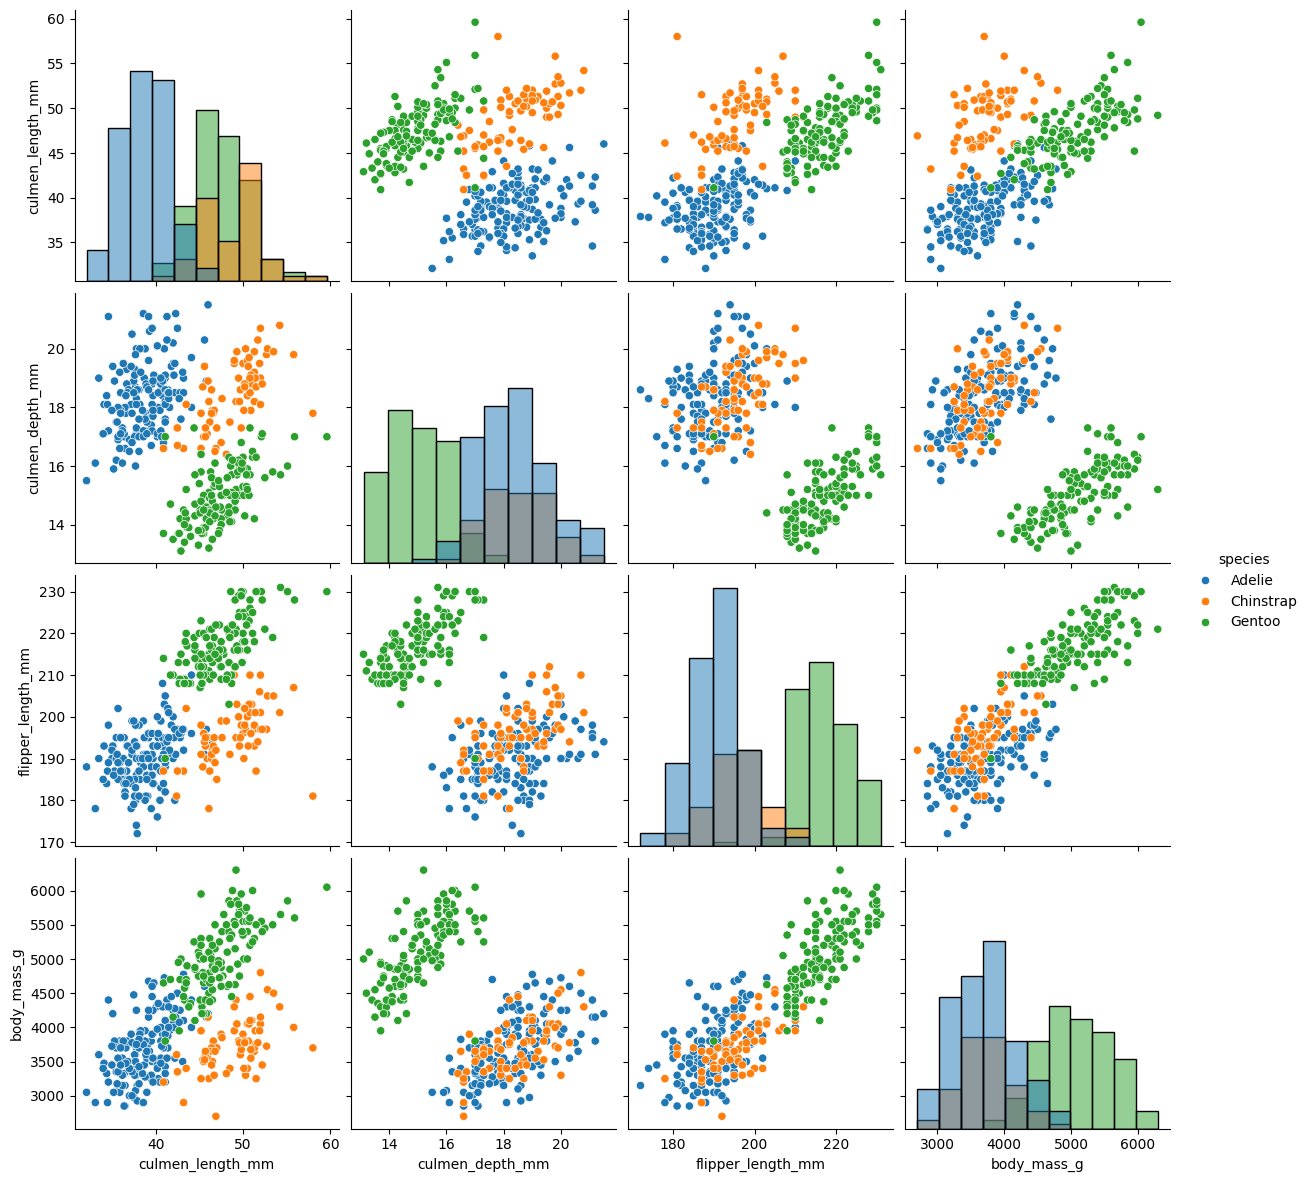

In [15]:
sns.pairplot(df2[['species','culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']], hue='species', size=3, diag_kind='hist')

sns.pairplot(df2[['species','culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g']], hue='species', size=3, diag_kind='hist')

In [16]:
print('상관계수')
df2.corr(numeric_only=True) # 공분산을 -1

상관계수


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.234635,0.656856,0.595720
culmen_depth_mm,-0.234635,1.000000,-0.582472,-0.471339
flipper_length_mm,0.656856,-0.582472,1.000000,0.871302
body_mass_g,0.595720,-0.471339,0.871302,1.000000


### 참고
 | r | = 절대값

 - 0 <= | r | < 0.2 : 상관관계가 없다.

In [20]:
from sklearn.preprocessing import LabelEncoder

# 인코더(인코딩 객체) 생성
le = LabelEncoder()

# 예시 데이터
labels = ['ㄱ','ㄴ','ㄷ','ㄹ']

# 레이블 인코딩 수행
encoded = le.fit_transform(labels)

print('클래스 목록 : ', le.classes_)
print('인코딩 변환값 : ', encoded)

# 인코딩 결과에서 원래 문자열 값으로 복원(디코딩)
decoded = le.inverse_transform(encoded)
print('디코딩 결과 : ', decoded)

클래스 목록 :  ['ㄱ' 'ㄴ' 'ㄷ' 'ㄹ']
인코딩 변환값 :  [0 1 2 3]
디코딩 결과 :  ['ㄱ' 'ㄴ' 'ㄷ' 'ㄹ']


LabelEncoder는 순서 없는 범주형 변수에도 정수값을 부여하기
때문에, 의미없는 숫자ㄴ의 크기 비교가 생길 수 있다.
<br>

머신러닝 알고리즘(특히 선형모델, 거리 기반 모델)에서는
OneHotEncoder가 적합한 경우가 많음.

In [22]:
# df2 본 데이터에서 문자열 형태 데이터 확인
df2.dtypes == 'object'

,0
species,True
island,True
culmen_length_mm,False
culmen_depth_mm,False
flipper_length_mm,False
body_mass_g,False
sex,True


In [23]:
(df2.dtypes == 'object').values

array([ True,  True, False, False, False, False,  True])

In [26]:
df2.columns[(df2.dtypes == 'object')]

Index(['species', 'island', 'sex'], dtype='object')

<Axes: xlabel='species'>

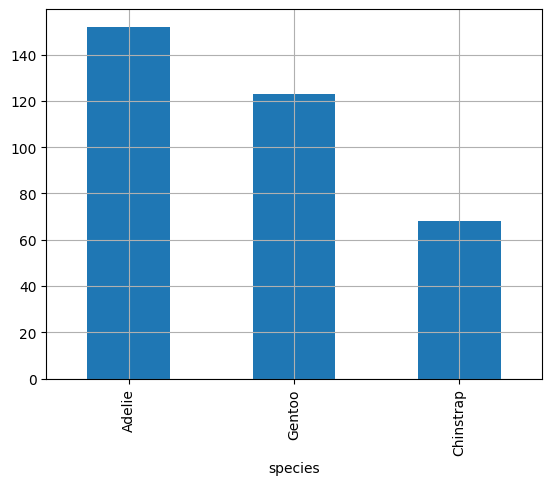

In [43]:
df2[cat_features[0]].value_counts().plot(kind='bar', grid=True)

In [38]:
# 성별 컬럼에 .으로 입력되어 있는 행 정보 확인
df2[df2['sex'] == ' .']


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [40]:
# 1개 행 제거
df2.drop(336, inplace=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            343 non-null    object 
 1   island             343 non-null    object 
 2   culmen_length_mm   343 non-null    float64
 3   culmen_depth_mm    343 non-null    float64
 4   flipper_length_mm  343 non-null    float64
 5   body_mass_g        343 non-null    float64
 6   sex                343 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


데이터 분리
- 문제, 답 분리
- 학습, 테스트용 데이터 분리


In [44]:
X = df2.iloc[ : , 1: ]
y = df2.iloc[ : , 0 ]

print(X.shape, y.shape)

(343, 6) (343,)


In [45]:
y.value_counts()

,count
species,
Adelie,152
Gentoo,123
Chinstrap,68


In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             343 non-null    object 
 1   culmen_length_mm   343 non-null    float64
 2   culmen_depth_mm    343 non-null    float64
 3   flipper_length_mm  343 non-null    float64
 4   body_mass_g        343 non-null    float64
 5   sex                343 non-null    object 
dtypes: float64(4), object(2)
memory usage: 18.8+ KB


In [48]:
# 원핫 인코딩
X = pd.get_dummies(X)

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   343 non-null    float64
 1   culmen_depth_mm    343 non-null    float64
 2   flipper_length_mm  343 non-null    float64
 3   body_mass_g        343 non-null    float64
 4   island_Biscoe      343 non-null    bool   
 5   island_Dream       343 non-null    bool   
 6   island_Torgersen   343 non-null    bool   
 7   sex_FEMALE         343 non-null    bool   
 8   sex_MALE           343 non-null    bool   
dtypes: bool(5), float64(4)
memory usage: 15.1 KB


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# random_state = 7 : 랜덤시드 고정, 재현성 확보
# stratify=y : 정답데이터의 비율 유지

X_train

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
222,48.7,14.1,210.0,4450.0,True,False,False,True,False
244,42.9,13.1,215.0,5000.0,True,False,False,True,False
16,38.7,19.0,195.0,3450.0,False,False,True,True,False
202,48.1,16.4,199.0,3325.0,False,True,False,True,False
194,50.9,19.1,196.0,3550.0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...
211,45.6,19.4,194.0,3525.0,False,True,False,True,False
67,41.1,19.1,188.0,4100.0,True,False,False,False,True
25,35.3,18.9,187.0,3800.0,True,False,False,True,False
196,50.9,17.9,196.0,3675.0,False,True,False,True,False


<Axes: xlabel='species'>

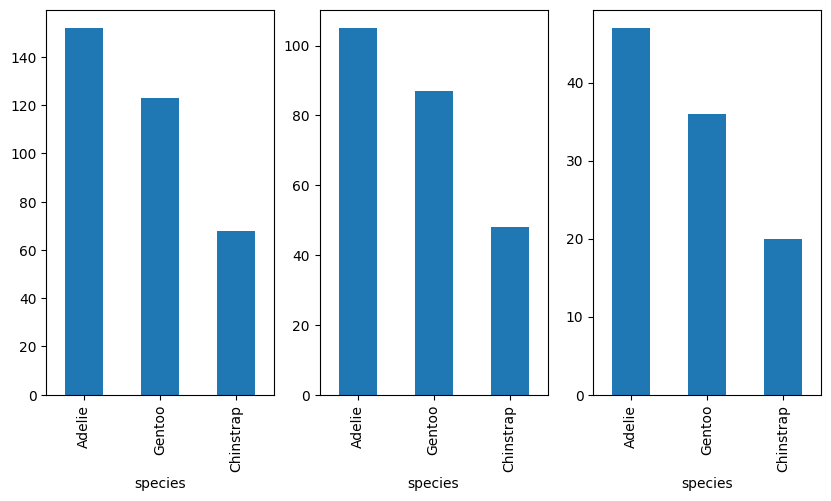

In [56]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
y.value_counts().plot(kind='bar')

plt.subplot(1,3,2)
y_train.value_counts().plot(kind='bar')

plt.subplot(1,3,3)
y_test.value_counts().plot(kind='bar')

### 4. 모델링
- 모델 객체 생성
- 학습
- 예측
- 평가

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier(random_state=7)
dt.fit(X_train, y_train)

In [63]:
# 모델 객체 생성


NameError: name 'RandomForestClassifier' is not defined

In [66]:
# 모델 학습
tree_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# 모델 예측
tree_pre = tree_clf.predict(X_test)
rf_pre = rf_clf.predict(X_test)

NameError: name 'rf_clf' is not defined

In [65]:
# 모델 예측
tree_pre = tree_clf.predict(X_test)
rf_pre = rf_clf.predict(X_test)

NameError: name 'rf_clf' is not defined

In [68]:
# 모델 성능
from sklearn.metrics import accuracy_score # 모델 성능 평가 도구 import

print('결정트리 정확도 : ', accuracy_score(y_test, tree_pre)) # 실제값과 예측값 비교를 통해 정확도 출력
print('랜덤포레스트 정확도 : ', accuracy_score(y_test, rf_pre))

tree_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

결정트리 정확도 :  0.9320388349514563


NameError: name 'rf_pre' is not defined

## 5. 일반화 평가 및 성능 향상을 위한 노력
- 일반화 성능 평가 : 교차 검증(Cross Validation)


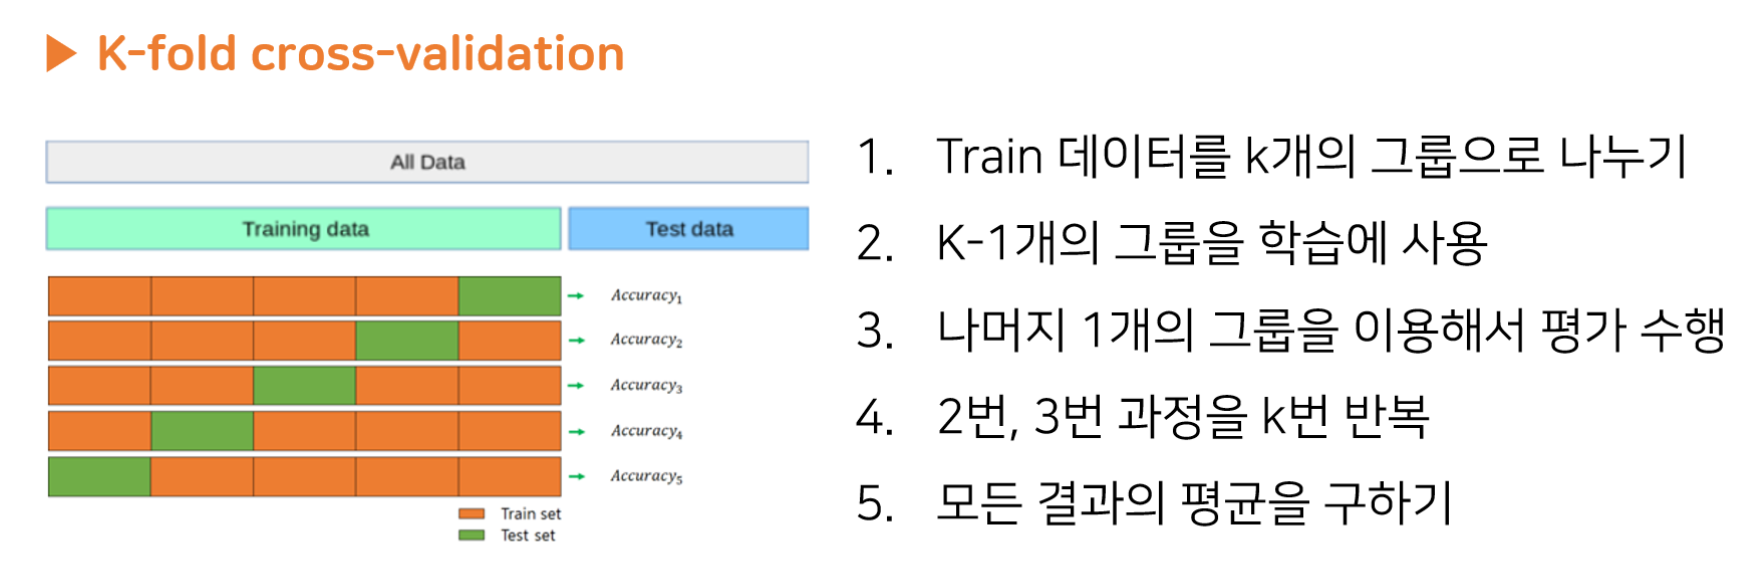

In [70]:
from sklearn.model_selection import cross_val_score

In [73]:
# 트리모델 교차검증
cross_val_score(tree_clf, X_train, y_train, cv=5)

array([1.        , 0.95833333, 0.9375    , 0.9375    , 0.97916667])

In [74]:
# 평균
cross_val_score(tree_clf, X_train, y_train, cv=5).mean()

np.float64(0.9708333333333334)

In [81]:
tree_pre = tree_clf.predict(X_test)
rf_pre = rf_clf.predict(X_test)

In [80]:


# 랜덤포레스트 모델 교차 검증
cross_val_score(rf_clf, X_train, y_train, cv=5)

array([1.        , 1.        , 0.97916667, 0.97916667, 1.        ])

In [77]:
# 모델 객체 생성
tree_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

In [79]:
# 모델 학습
tree_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# 모델 예측
tree_pre = tree_clf.predict(X_test)
rf_pre = rf_clf.predict(X_test)